Import packages

In [34]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras import models
from keras.models import load_model

Load data

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Analysing data

In [36]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [37]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
y_train[0]

5

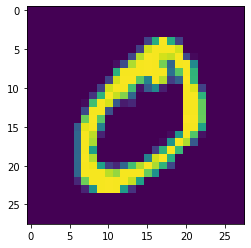

In [39]:
plt.imshow(X_train[1])

Data Preprocessing

In [40]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model creating

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.3219 - accuracy: 0.9487 - val_loss: 0.0989 - val_accuracy: 0.9696
Epoch 2/5
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0755 - accuracy: 0.9770 - val_loss: 0.0738 - val_accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0876 - val_accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.0996 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.1338 - val_accuracy: 0.9734


Test the model

In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1337573528289795, 0.9733999967575073]


In [15]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 86ms/step
[[6.85007329e-11 4.38652349e-18 1.39965883e-09 1.88074836e-08
  4.08184188e-21 5.90959302e-15 1.58556775e-20 1.00000000e+00
  3.08006557e-14 1.60521954e-12]
 [2.17329865e-12 4.50507230e-07 9.99999523e-01 7.86995885e-11
  3.30033815e-18 5.86159931e-19 1.84150224e-08 7.13595686e-19
  3.94319289e-13 4.03706550e-24]
 [6.56994792e-10 9.99988317e-01 1.11597542e-09 8.81837531e-15
  3.90661580e-06 7.57758922e-09 1.09798816e-10 8.51522852e-09
  7.68911650e-06 1.11233971e-12]
 [9.99993801e-01 7.65753916e-17 7.72908682e-10 4.44987539e-14
  7.72375490e-13 8.36701455e-12 2.66041855e-10 6.25335904e-17
  9.79984214e-13 6.18349441e-06]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
model.save("model.h5")

In [28]:
model=load_model('model.h5')